In [296]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import pandas as pd
import matplotlib.pyplot as plt
import re

In [297]:
cid = '48f20df304384a328796c4a52c08d7a8'
secret = '218ed91bb84647e28253b97ed52eecf2'

In [298]:
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [299]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [300]:
def get_artists(username, playlist_id):
    playlist_tracks = get_playlist_tracks(username, playlist_id)

    artists = []
    artist_ids = []
    genres = []

    # extract artist names from each track in the playlist
    for track in playlist_tracks:
        for artist in track['track']['artists']:
            artists.append(artist['name'])
            artist_ids.append(artist['id'])
            artist_info = sp.artist(artist['id'])
            genres.append(artist_info['genres'])

    # convert the lists of artist names, IDs, and genres to a dataframe
    df = pd.DataFrame({'Artist Name': artists, 'Artist ID': artist_ids, 'Genres': genres})

    return df

In [301]:
p1 = get_artists('spotify','37i9dQZF1EIcBnLtsmoJ8l')

In [302]:
p2 = get_artists('spotify','37i9dQZF1EIdjtB4g4SnBu')

In [303]:
p3 = get_artists('spotify','37i9dQZF1EIdThJL1CyWNZ')

In [304]:
p4 = get_artists('spotify','37i9dQZF1DX9VqxLqwPHz2')

In [305]:
p5 = get_artists('spotify','37i9dQZF1DX70RN3TfWWJh')

In [306]:
# concatenate the dataframes together
artists_df = pd.concat([p1, p2, p3, p4, p5], ignore_index=True)

# remove duplicates based on 'Artist Name' column
artists_df = artists_df.drop_duplicates(subset='Artist Name')

# drop rows where 'Genres' column contains empty lists
artists_df = artists_df[artists_df['Genres'].apply(lambda x: len(x) > 0)]

artists_df.reset_index(drop=True, inplace=True)

# dataframe containing artist database
artists_df

,Artist Name,Artist ID,Genres
0,Eminem,7dGJo4pcD2V6oG8kP0tJRR,"[detroit hip hop, hip hop, rap]"
1,Nate Dogg,1Oa0bMld0A3u5OTYfMzp5h,"[g funk, gangster rap, hardcore hip hop, hip h..."
2,Taylor Swift,06HL4z0CvFAxyc27GXpf02,[pop]
3,Kanye West,5K4W6rqBFWDnAN6FQUkS6x,"[chicago rap, hip hop, rap]"
4,Olivia Rodrigo,1McMsnEElThX1knmY4oliG,[pop]
5,Pitbull,0TnOYISbd1XYRBk9myaseg,"[dance pop, miami hip hop, pop]"
6,AFROJACK,4D75GcNG95ebPtNvoNVXhz,"[big room, dance pop, dutch house, edm, electr..."
7,Ne-Yo,21E3waRsmPlU7jZsS13rcj,"[dance pop, pop, r&b, urban contemporary]"
8,Nayer,1ruutHJcECI7cos2n5TqpO,[deep dance pop]
9,David Guetta,1Cs0zKBU1kc0i8ypK3B9ai,"[big room, dance pop, edm, pop, pop dance]"


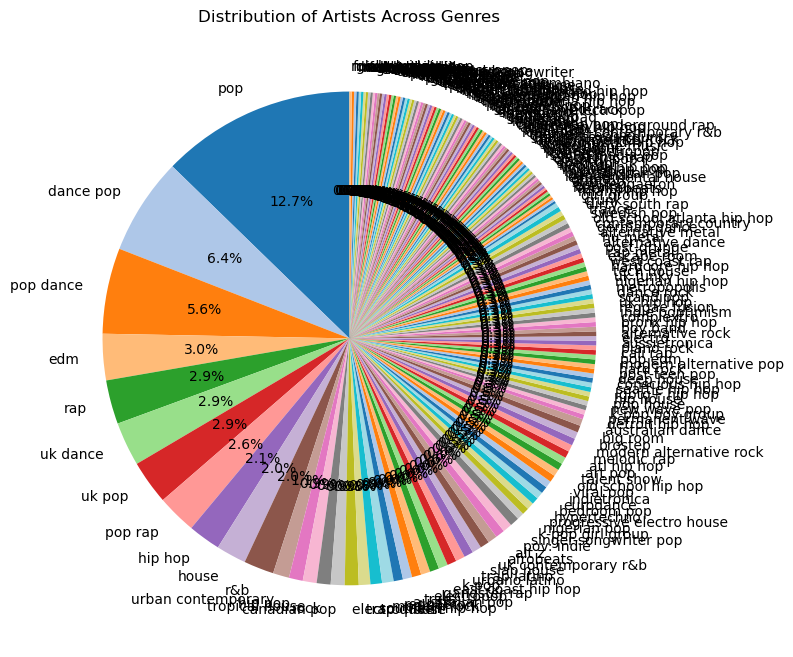

In [307]:
# flatten the genres lists into individual rows
df_flat = artists_df.explode('Genres')

# count the number of artists per genre
genre_counts = df_flat['Genres'].value_counts()

# plot the pie chart
plt.figure(figsize=(8, 8))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Distribution of Artists Across Genres')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [308]:
genres_df = pd.DataFrame({'Genre': genre_counts.index, 'Number of Artists': genre_counts.values})

In [309]:
artists_df.to_csv('artists_data.csv', index=False)
genres_df.to_csv('genres_data.csv', index=False)

In [310]:
# USER INPUT
user_link = 'https://open.spotify.com/user/31qkz6ztbbugzgqhlr4hl6gnh2be'
playlist_link = 'https://open.spotify.com/playlist/0et0irddwPaKj6qv5kFwFP'
favourite_artists = ['Taylor Swift', 'Coldplay']

In [311]:
start_index_u = user_link.find("/user/") + len("/user/")
start_index_p = playlist_link.find("/playlist/") + len("/playlist/")

user_id = user_link[start_index_u:]
playlist_id = playlist_link[start_index_p:]

print(user_id)
print(playlist_id)

31qkz6ztbbugzgqhlr4hl6gnh2be
0et0irddwPaKj6qv5kFwFP


In [312]:
user_df = get_artists(user_id, playlist_id)

In [313]:
def get_favourite_artists(artists):
    df = pd.DataFrame(columns=['Artist Name', 'Artist ID', 'Genres'])
    
    for artist in artists:
        artist_info = sp.search(q=artist, limit=1, offset=0, type='artist', market=None)
        items = artist_info['artists']['items']
        if items:  
            artist_name = items[0]['name']
            artist_id = items[0]['id'] 
            genres = items[0]['genres']  
            df = df.append({'Artist Name': artist_name, 'Artist ID': artist_id, 'Genres': genres}, ignore_index=True)
            
    return df

In [314]:
fav_artists_df = get_favourite_artists(favourite_artists)
fav_artists_df

/var/folders/r8/w16jv_cd7yxf2kslz6zvffgr0000gn/T/ipykernel_14014/1533186568.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Artist Name': artist_name, 'Artist ID': artist_id, 'Genres': genres}, ignore_index=True)
/var/folders/r8/w16jv_cd7yxf2kslz6zvffgr0000gn/T/ipykernel_14014/1533186568.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Artist Name': artist_name, 'Artist ID': artist_id, 'Genres': genres}, ignore_index=True)


,Artist Name,Artist ID,Genres
0,Taylor Swift,06HL4z0CvFAxyc27GXpf02,[pop]
1,Coldplay,4gzpq5DPGxSnKTe4SA8HAU,"[permanent wave, pop]"


In [315]:
user_df = pd.concat([user_df, fav_artists_df], ignore_index=True)

In [316]:
user_df

,Artist Name,Artist ID,Genres
0,Clean Bandit,6MDME20pz9RveH9rEXvrOM,"[pop, uk dance, uk funky]"
1,Jess Glynne,4ScCswdRlyA23odg9thgIO,"[dance pop, pop, uk pop]"
2,Ariana Grande,66CXWjxzNUsdJxJ2JdwvnR,[pop]
3,Zedd,2qxJFvFYMEDqd7ui6kSAcq,"[complextro, edm, german techno, pop, pop dance]"
4,Justin Bieber,1uNFoZAHBGtllmzznpCI3s,"[canadian pop, pop]"
5,Jaden,0xOeVMOz2fVg5BJY3N6akT,"[pop rap, rap]"
6,Justin Timberlake,31TPClRtHm23RisEBtV3X7,"[dance pop, pop]"
7,Tescao,4gPqYkRroq7Ddok3yNG73d,[]
8,Maroon 5,04gDigrS5kc9YWfZHwBETP,[pop]
9,Wiz Khalifa,137W8MRPWKqSmrBGDBFSop,"[hip hop, pittsburgh rap, pop rap, rap, southe..."


In [317]:
# remove duplicates based on 'Artist Name' column
user_df = user_df.drop_duplicates(subset='Artist Name')

# drop rows where 'Genres' column contains empty lists
user_df = user_df[user_df['Genres'].apply(lambda x: len(x) > 0)]

user_df.reset_index(drop=True, inplace=True)

# dataframe containing user's artist data
user_df

,Artist Name,Artist ID,Genres
0,Clean Bandit,6MDME20pz9RveH9rEXvrOM,"[pop, uk dance, uk funky]"
1,Jess Glynne,4ScCswdRlyA23odg9thgIO,"[dance pop, pop, uk pop]"
2,Ariana Grande,66CXWjxzNUsdJxJ2JdwvnR,[pop]
3,Zedd,2qxJFvFYMEDqd7ui6kSAcq,"[complextro, edm, german techno, pop, pop dance]"
4,Justin Bieber,1uNFoZAHBGtllmzznpCI3s,"[canadian pop, pop]"
5,Jaden,0xOeVMOz2fVg5BJY3N6akT,"[pop rap, rap]"
6,Justin Timberlake,31TPClRtHm23RisEBtV3X7,"[dance pop, pop]"
7,Maroon 5,04gDigrS5kc9YWfZHwBETP,[pop]
8,Wiz Khalifa,137W8MRPWKqSmrBGDBFSop,"[hip hop, pittsburgh rap, pop rap, rap, southe..."
9,blackbear,2cFrymmkijnjDg9SS92EPM,[pop]


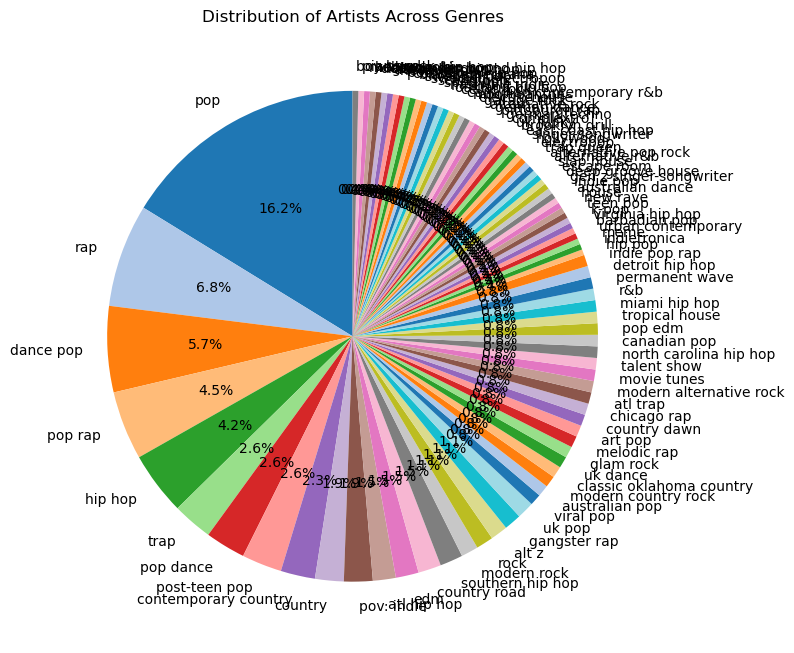

In [318]:
# flatten the genres lists into individual rows
df_flat_u = user_df.explode('Genres')

# count the number of artists per genre
genre_counts_u = df_flat_u['Genres'].value_counts()

# plot the pie chart
plt.figure(figsize=(8, 8))
genre_counts_u.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Distribution of Artists Across Genres')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [319]:
df_flat_u

,Artist Name,Artist ID,Genres
0,Clean Bandit,6MDME20pz9RveH9rEXvrOM,pop
0,Clean Bandit,6MDME20pz9RveH9rEXvrOM,uk dance
0,Clean Bandit,6MDME20pz9RveH9rEXvrOM,uk funky
1,Jess Glynne,4ScCswdRlyA23odg9thgIO,dance pop
1,Jess Glynne,4ScCswdRlyA23odg9thgIO,pop
1,Jess Glynne,4ScCswdRlyA23odg9thgIO,uk pop
2,Ariana Grande,66CXWjxzNUsdJxJ2JdwvnR,pop
3,Zedd,2qxJFvFYMEDqd7ui6kSAcq,complextro
3,Zedd,2qxJFvFYMEDqd7ui6kSAcq,edm
3,Zedd,2qxJFvFYMEDqd7ui6kSAcq,german techno


In [326]:
top_genre = genre_counts_u.head(2)
top_genres_df = pd.DataFrame({'Genre': top_genre.index, 'Number of Artists': top_genre.values})
top_genres_df

,Genre,Number of Artists
0,pop,43
1,rap,18


In [328]:
genres = top_genres_df.iloc[:, 0].tolist()

fav_artist_ids = fav_artists_df['Artist ID'].tolist()

# filter rows based on genre match but ensure favorite artists are included
filtered_genre_df = df_flat_u[
    ((df_flat_u['Genres'].apply(lambda x: any(genre in x for genre in genres))) |
    (df_flat_u['Artist ID'].isin(fav_artist_ids)))
]

# create a set of artist names from the filtered DataFrame
artist_set = set(filtered_genre_df['Artist Name'])

# filter user_df based on artist_set
filtered_df = user_df[user_df['Artist Name'].isin(artist_set)]

filtered_df.reset_index(drop=True, inplace=True)

print(len(filtered_df))

79


In [329]:
filtered_df

,Artist Name,Artist ID,Genres
0,Clean Bandit,6MDME20pz9RveH9rEXvrOM,"[pop, uk dance, uk funky]"
1,Jess Glynne,4ScCswdRlyA23odg9thgIO,"[dance pop, pop, uk pop]"
2,Ariana Grande,66CXWjxzNUsdJxJ2JdwvnR,[pop]
3,Zedd,2qxJFvFYMEDqd7ui6kSAcq,"[complextro, edm, german techno, pop, pop dance]"
4,Justin Bieber,1uNFoZAHBGtllmzznpCI3s,"[canadian pop, pop]"
5,Jaden,0xOeVMOz2fVg5BJY3N6akT,"[pop rap, rap]"
6,Justin Timberlake,31TPClRtHm23RisEBtV3X7,"[dance pop, pop]"
7,Maroon 5,04gDigrS5kc9YWfZHwBETP,[pop]
8,Wiz Khalifa,137W8MRPWKqSmrBGDBFSop,"[hip hop, pittsburgh rap, pop rap, rap, southe..."
9,blackbear,2cFrymmkijnjDg9SS92EPM,[pop]


In [330]:
filtered_df.to_csv('filtered_artists.csv', index=False)